## Training Set과 Test Set 나누기

In [1]:
import pandas as pd
df = pd.read_csv('data/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.loc[df['Species'] == 'Iris-setosa', 'Species'] = 0
df.loc[df['Species'] == 'Iris-virginica', 'Species'] = 1
df.loc[df['Species'] == 'Iris-versicolor', 'Species'] = 2
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,1
146,147,6.3,2.5,5.0,1.9,1
147,148,6.5,3.0,5.2,2.0,1
148,149,6.2,3.4,5.4,2.3,1


In [3]:
iris_data = df.drop('Id', axis = 1)
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


## 피어슨계수 히트맵으로 시각화하기

In [4]:
import matplotlib.pyplot as plt
# %matplotlib inline

import seaborn as sns
sns.set()

iris_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


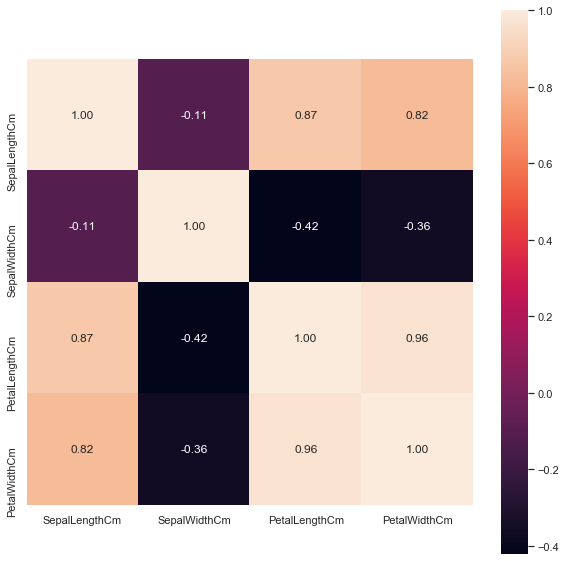

In [5]:
plt.figure(figsize = (10, 10))
sns.heatmap(iris_data.corr(), annot = True, fmt = '.2f', square = True)
# annot=False 로 하면 숫자 안나옴. 
# fmt = '.4f'로 하면 소수점 넷째자리까지 나옴.
plt.show()

In [6]:
input_data = iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
target_data = iris_data['Species']

input_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
target_data

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: Species, Length: 150, dtype: object

### train_test_split

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size = 0.3)

x_train.count()

SepalLengthCm    105
SepalWidthCm     105
PetalLengthCm    105
PetalWidthCm     105
dtype: int64

In [9]:
x_test.count()

SepalLengthCm    45
SepalWidthCm     45
PetalLengthCm    45
PetalWidthCm     45
dtype: int64

In [10]:
y_train.count()

105

In [11]:
y_test.count()

45

## Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train, y_train) # 학습 .fit( , )

print('train set score', lr.score(x_train, y_train)) # 점수 .score( , )

train set score 0.55761725407816


## predict하기


In [13]:
# x_test의 test 결과
prediction = lr.predict(x_test)
prediction

array([ 1.15549704,  1.09033733,  1.4586837 ,  1.13119797,  0.11576187,
        0.06148026,  1.03522432,  0.45552203,  0.59626605,  1.72615446,
       -0.39494517,  0.48338758,  1.30755348,  0.00634547,  1.23515449,
        0.28624823,  1.39651519,  2.01665858, -0.13407382,  1.05310918,
        1.16556553,  0.97841646,  1.55330901,  1.2845777 , -0.32111848,
        0.23256292,  1.617089  ,  1.12130366,  1.24805219,  1.02479973,
        1.24539014,  1.48229675,  1.21469538,  1.01509954,  1.61489265,
       -0.0594471 ,  0.43739506,  1.21810429,  1.58180741, -0.2012845 ,
        1.42653428,  0.19763745,  1.68663699,  1.39064162,  0.24061182])

In [16]:
prediction[prediction < 0.5] = 0
prediction[(prediction >= 0.5)&(prediction < 1.5)] = 1
prediction[prediction >= 1.5] = 2

prediction = prediction.astype(int)
prediction

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1,
       2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1,
       0])